In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

In [66]:
# 1. Impor Data dan Informasi Dataset
df = pd.read_csv('fish_data.csv')
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB
None


In [67]:
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
              species  length  weight  w_l_ratio
0  Anabas testudineus   10.66    3.45       0.32
1  Anabas testudineus    6.91    3.27       0.47
2  Anabas testudineus    8.38    3.46       0.41
3  Anabas testudineus    7.57    3.36       0.44
4  Anabas testudineus   10.83    3.38       0.31


In [68]:
# 2. Deskripsi Data
print("\nDataset Description:")
print(df.describe())


Dataset Description:
            length       weight    w_l_ratio
count  4080.000000  4080.000000  4080.000000
mean     17.353544     3.739875     0.252782
std       7.114684     1.040365     0.123046
min       6.360000     2.050000     0.080000
25%      11.327500     3.070000     0.170000
50%      17.350000     3.310000     0.190000
75%      22.585000     4.100000     0.340000
max      33.860000     6.290000     0.640000


In [69]:
# 3. Encoding Kategorikal (jika ada)
label_encoder = LabelEncoder()
if df.select_dtypes(include=['object']).shape[1] > 0:
    # Mencari kolom kategorikal dan melakukan encoding
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = label_encoder.fit_transform(df[col])

In [70]:

# 4. Scaling Data (menyusun fitur dan target)
X = df.drop('species', axis=1)  # Asumsikan 'label' adalah kolom target
y = df['species']

In [71]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
# 5. Membagi Data untuk Pelatihan dan Pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [73]:
# 6. Melatih Model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [74]:
# 7. Evaluasi Model (Akurasi)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy * 100:.2f}%")



Akurasi Model: 92.28%


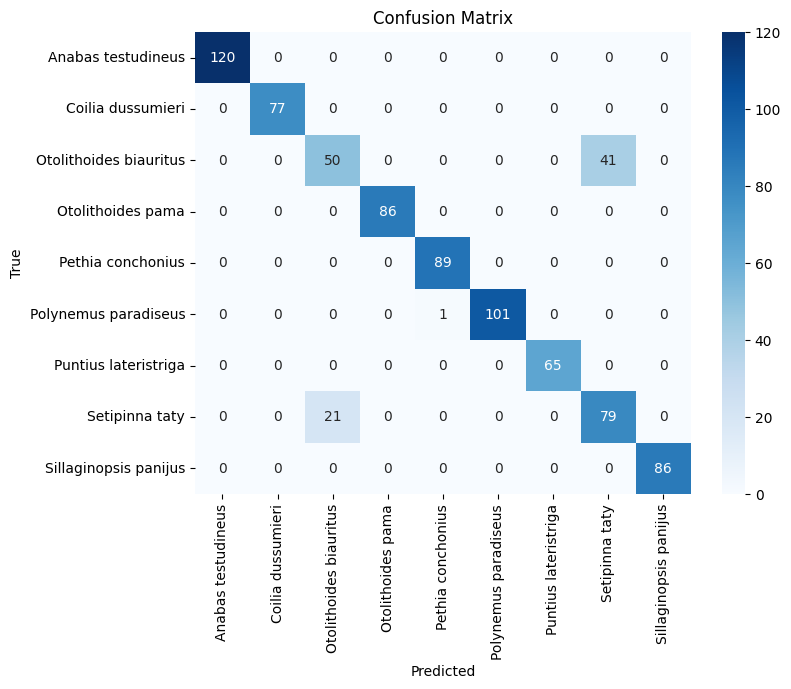

In [75]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [76]:
# 8. Menyimpan Model dengan Pickle
with open('Logistic_Regression_fruit_model.pkl', 'wb') as file:
    pickle.dump(model, file)
    pickle.dump(scaler, file)
with open('LabelEncoder_fruit.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)



In [77]:
# 9. Pengetesan dengan Data Baru (contoh data)
new_data = np.array([[5.5, 150, 0.8]])  # Misalkan ada 4 fitur
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [78]:
# Output hasil prediksi
predicted_label = label_encoder.inverse_transform(prediction)
print("\nPrediksi untuk data baru:", predicted_label)


Prediksi untuk data baru: ['Pethia conchonius']
